# Plotting Confounds 

In [7]:
import glob, os
import pandas as pd
from IPython.core import display as ICD
import matplotlib.pyplot as plt

%matplotlib inline 

In [8]:
# get our data files
subjects = [('sub-006', "run-3") , ('sub-036', 'run-2'), ('sub-040', 'run-1'),
            ('sub-100', 'run-4'), ('sub-108', 'run-3'), ('sub-108', 'run-4'),
            ('sub-115', 'run-1'), ('sub-119', 'run-2'), ('sub-121', 'run-2'),
            ('sub-127', 'run-3'), ('sub-127', 'run-4'), ('sub-138', 'run-2'),
            ('sub-144', 'run-1'), ('sub-150', 'run-1')]
            
            

In [9]:
moco_cols = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
mot_outliers=['motion_outlier00', 'motion_outlier01', 'motion_outlier02',
              'motion_outlier03','motion_outlier04', 'motion_outlier05']

In [10]:
#tsv_df.columns.values

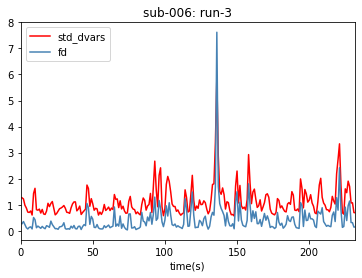

Spike count: 3 
Spikes found: 
Time: 135 	| Spike: 3.38
Time: 136 	| Spike: 5.88
Time: 221 	| Spike: 3.34


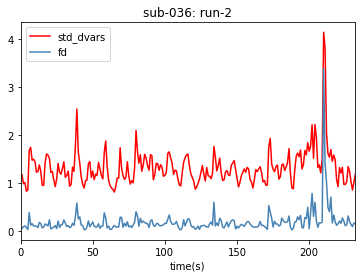

Spike count: 2 
Spikes found: 
Time: 210 	| Spike: 4.13
Time: 211 	| Spike: 3.8


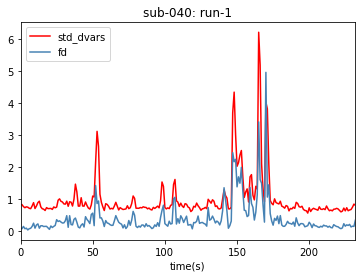

Spike count: 8 
Spikes found: 
Time: 53 	| Spike: 3.11
Time: 147 	| Spike: 3.7
Time: 148 	| Spike: 4.34
Time: 149 	| Spike: 3.01
Time: 165 	| Spike: 6.21
Time: 166 	| Spike: 5.19
Time: 170 	| Spike: 4.03
Time: 171 	| Spike: 3.82


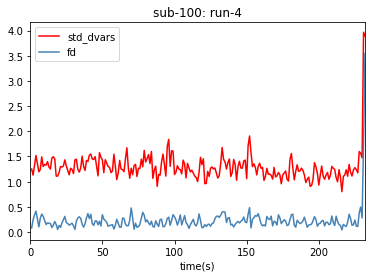

Spike count: 2 
Spikes found: 
Time: 231 	| Spike: 3.97
Time: 232 	| Spike: 3.89


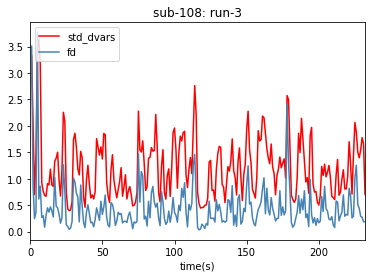

Spike count: 4 
Spikes found: 
Time: 1 	| Spike: 3.32
Time: 5 	| Spike: 3.47
Time: 6 	| Spike: 3.64
Time: 7 	| Spike: 3.15


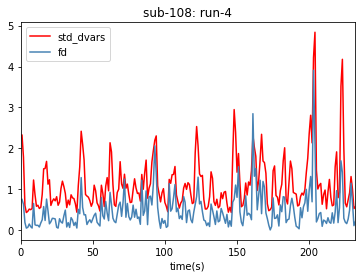

Spike count: 4 
Spikes found: 
Time: 203 	| Spike: 4.22
Time: 204 	| Spike: 4.84
Time: 222 	| Spike: 3.52
Time: 223 	| Spike: 4.18


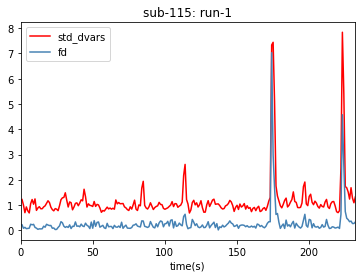

Spike count: 5 
Spikes found: 
Time: 174 	| Spike: 7.33
Time: 175 	| Spike: 7.44
Time: 176 	| Spike: 5.08
Time: 223 	| Spike: 7.84
Time: 224 	| Spike: 5.41


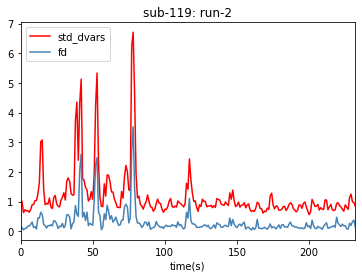

Spike count: 11 
Spikes found: 
Time: 14 	| Spike: 3.02
Time: 15 	| Spike: 3.08
Time: 38 	| Spike: 3.73
Time: 39 	| Spike: 4.35
Time: 41 	| Spike: 4.32
Time: 42 	| Spike: 5.13
Time: 52 	| Spike: 4.23
Time: 53 	| Spike: 5.33
Time: 77 	| Spike: 6.22
Time: 78 	| Spike: 6.71
Time: 79 	| Spike: 4.67


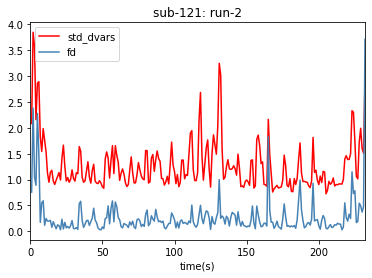

Spike count: 4 
Spikes found: 
Time: 2 	| Spike: 3.85
Time: 3 	| Spike: 3.56
Time: 131 	| Spike: 3.25
Time: 132 	| Spike: 3.02


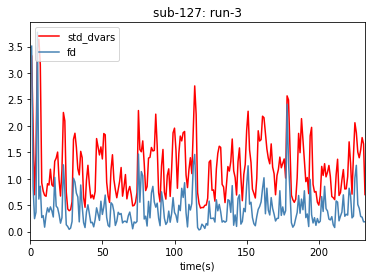

Spike count: 4 
Spikes found: 
Time: 1 	| Spike: 3.32
Time: 5 	| Spike: 3.47
Time: 6 	| Spike: 3.64
Time: 7 	| Spike: 3.16


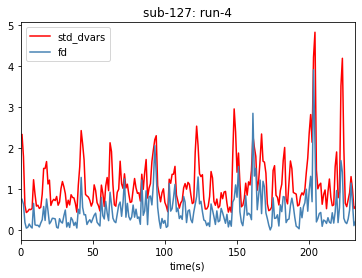

Spike count: 4 
Spikes found: 
Time: 203 	| Spike: 4.21
Time: 204 	| Spike: 4.82
Time: 222 	| Spike: 3.52
Time: 223 	| Spike: 4.19


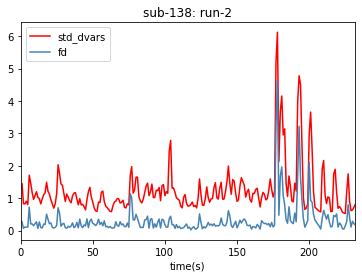

Spike count: 9 
Spikes found: 
Time: 177 	| Spike: 5.2
Time: 178 	| Spike: 6.12
Time: 180 	| Spike: 3.68
Time: 181 	| Spike: 4.15
Time: 183 	| Spike: 3.14
Time: 192 	| Spike: 3.94
Time: 193 	| Spike: 4.78
Time: 194 	| Spike: 4.5
Time: 201 	| Spike: 3.66


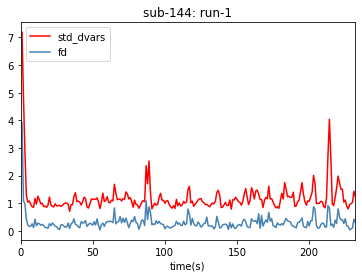

Spike count: 3 
Spikes found: 
Time: 1 	| Spike: 7.19
Time: 2 	| Spike: 4.83
Time: 214 	| Spike: 4.04


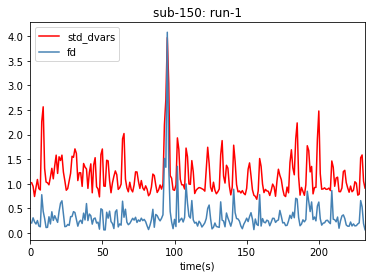

Spike count: 2 
Spikes found: 
Time: 95 	| Spike: 3.97
Time: 96 	| Spike: 3.04


In [11]:

for sub in subjects:
    plt.figure()
    tsv=os.path.join("/projects/niblab/bids_projects/Experiments/bbx/bids/derivatives/fmriprep/{}/ses-1/func/{}_ses-1_task-training_{}_desc-confounds_regressors.tsv".format(sub[0], sub[0], sub[1]))
    tsv_df = pd.read_csv(tsv, sep='\t')
    tsv_df.rename_axis("time(s)", inplace=True)
    #print(tsv_df.head())
    #for x in moco_cols:
     #   tsv_df[x].plot(kind='line',xlim=(0,200),ylim=(-.7,.6))
    min_pt = tsv_df['std_dvars'].min() - .3
    max_pt = tsv_df['std_dvars'].max() + .3
    max_time_pt = tsv_df.index.stop
    spikes=[]
    for index,pt in tsv_df['std_dvars'].iteritems():
        if pt > 3:
            spikes.append((round(pt,2), index))
    
    # plot 
    tsv_df['std_dvars'].plot(kind='line', color='r',label="std_dvars", title="{}: {}".format(sub[0],sub[1]))#,xlim=(0, max_time_pt),ylim=(min_pt, max_pt), title="{}: {}".format(sub[0],sub[1]), color='r')
    tsv_df['framewise_displacement'].plot(kind='line', color='steelblue', label="fd")#,xlim=(0, max_time_pt),ylim=(min_pt, max_pt), title="{}: {}".format(sub[0],sub[1]), color='r')
    plt.legend(loc="upper left")

    plt.show()
    print("Spike count: {} \nSpikes found: ".format(len(spikes)))
    for x in spikes:
        print("Time: {} \t| Spike: {}".format(x[1], x[0]) )
    